In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *

DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952

def level(row):
    x=row['TaxiCount']
    if x <= 12:
        return 0
    elif x <= 25:
        return 1
    elif x <= 37:
        return 2
    else:
        return 3

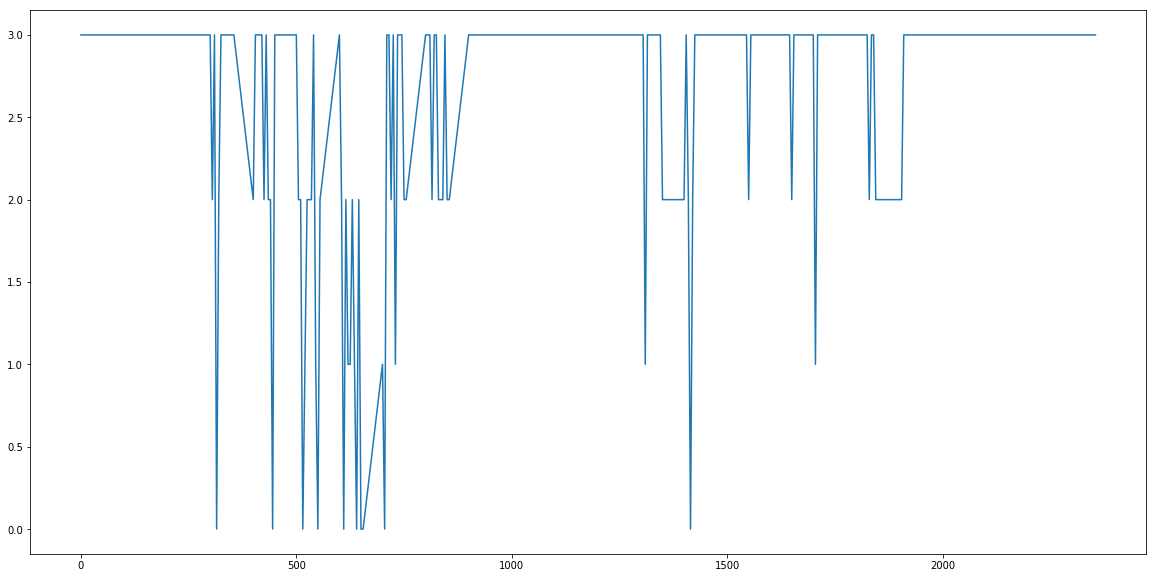

In [2]:
df=taxis.getdf_loc_dates(DBNAME,['20170627'],LAT1,LON1)
df['Level']=df.apply(level,axis=1)
df.head()
plot_data([(df['Time'].tolist(),df['Level'].tolist())])

[0]
[[ 1384.52054795]
 [  781.4084507 ]
 [ 2030.8125    ]
 [  228.25      ]]


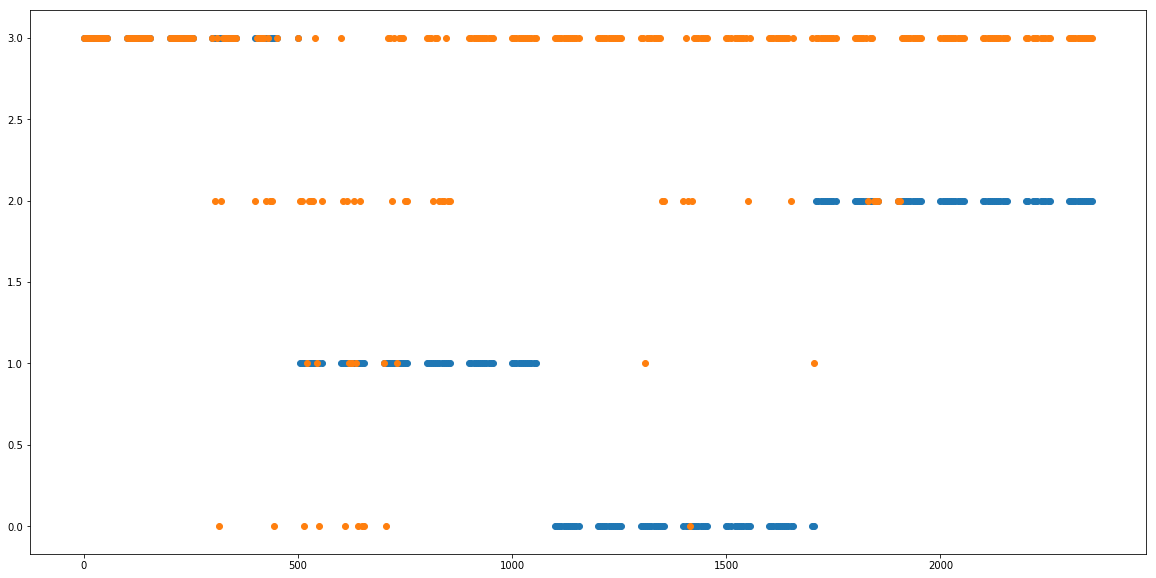

In [12]:
from sklearn.cluster import KMeans
X=df[['Time']].as_matrix()

X=X.reshape(-1,1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

X_predict=np.array(['1425']).reshape(-1,1)

print kmeans.predict(X_predict)

print kmeans.cluster_centers_

plt.scatter(X,kmeans.predict(X))
plt.scatter(df['Time'],df['Level'])
plt.show()